# Feature Tasks:
Create 8 by 8 square chessboard with alternating black and white tiles. Create two Queens one red and one blue and indicate weather a queen is under attack based on their compared coordinates. 

#Classes and their methods:
- ChessBoard:
    - init creates dimensions of the board with numpy
    - add_red accepts row and column, adds color to specified cell
    - add_blue accepts row and column, adds color to specified cell
    - render uses matplotlib to render board with the "queens" shown in correct squares
    - is_under_attack: compares relative coords of red vs blue and returns boolean
    

#### imports and assignments:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 


In [3]:

class ChessBoard:
    """Creates instance of ChessBoard that is an 8 x 8 grid
    """

    def __init__(self):
        self.board = np.zeros((8, 8, 3))
        self.black = (0, 0, 0)
        self.white = (1, 1, 1)
        self.red = (1, .2, 0)
        self.blue = (0, 1, 1)
        self.red_queen = list()
        self.ice_queen = list()


        for coords in np.ndindex(8, 8):
            row = coords[0]
            col = coords[1]
            if row % 2 != col % 2:
                self.board[row, col] = self.white


    
    def __str__(self):
        return f'Instance of 8 x 8 chessboard'
    
    def __repr__(self):
        return f'8x8 chessboard Shape: {self.board.shape} shape at index 2 takes RGB values'
    

    def render(self):
        plt.imshow(self.board)

    def add_red(self, row=None, col=None):
        """accepts an row and column, and colors the board red at that location
           
           input <-- int, int
           output --> non-fruitful
        """
        if len(self.red_queen) == 0:
            self.red_queen.append(row)
            self.red_queen.append(col)
            self.board[self.red_queen[0], self.red_queen[1]] = self.red
            return
        else:
            if self.red_queen[0] % 2 != self.red_queen[1] % 2:
                self.board[self.red_queen[0], self.red_queen[1]] = self.white
            else:
                self.board[self.red_queen[0], self.red_queen[1]] = self.black

            self.red_queen = list() 
            return self.add_red(row, col)


    def add_blue(self, row=None, col=None):
        """accepts an row and column, and colors the board blue at that location
        
        input <-- int, int
        output --> non-fruitful
        """
        if len(self.ice_queen) == 0:
            self.ice_queen.append(row)
            self.ice_queen.append(col)
            self.board[self.ice_queen[0], self.ice_queen[1]] = self.blue
            return
        else:
            if self.ice_queen[0] % 2 != self.ice_queen[1] % 2:
                self.board[self.ice_queen[0], self.ice_queen[1]] = self.white
            else:
                self.board[self.ice_queen[0], self.ice_queen[1]] = self.black

            self.ice_queen = list() 
            return self.add_blue(row, col)   



    def is_under_attack(self):
        """checks if the red_queen is threatened by the ice_queen(blue)
           input <-- None
           output --> bool
        """
        if self.red_queen[0] == self.ice_queen[0]:
            return True
        elif self.red_queen[1] == self.ice_queen[1]:
            return True
        elif abs(self.red_queen[0] - self.ice_queen[0]) == abs(self.red_queen[1] - self.ice_queen[1]):
            return True
        else:
            return False

    
    







## Test Instance of Chessboard Class

In [4]:
fischer = ChessBoard()
actual = fischer.__repr__()
expected = '8x8 chessboard Shape: (8, 8, 3) shape at index 2 takes RGB values'
assert actual == expected


## Test ChessBoard.render()


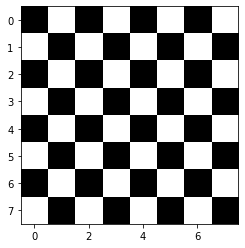

In [5]:
fischer.render()

## Test ChessBoard.add_red()

multiple testing for this factor includes initial call, call after initial call

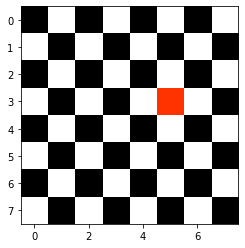

In [6]:
fischer.add_red(3, 5) #initial call
assert fischer.red_queen == [3, 5]
fischer.render()


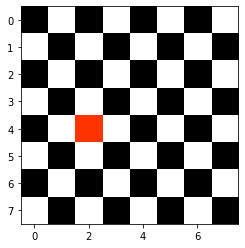

In [7]:
fischer.add_red(4, 2) # secondary call
assert fischer.red_queen == [4, 2]
fischer.render()

## Test that changes to Red Queen do not affect state of Blue Queen


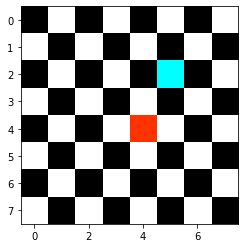

In [8]:
fischer.add_blue(2, 5)
fischer.add_red(4, 4)
assert fischer.ice_queen == [2, 5]
fischer.render()


## Test `is_under_attack` method vertical


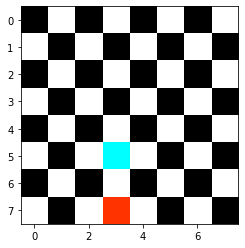

In [9]:
fischer.add_red(7, 3)
fischer.add_blue(5, 3)
fischer.render()
assert fischer.is_under_attack() == True

## Test `is_under_attack` method horizontal

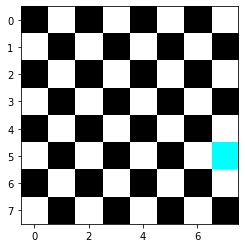

In [10]:
fischer.add_red(5, 3)
fischer.add_blue(5, 7)
fischer.render()
assert fischer.is_under_attack() == True


## Test `is_under_attack()` method L -> R Diagonal

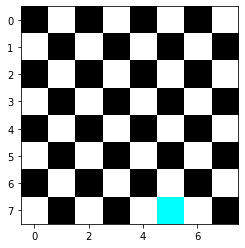

In [11]:
fischer.add_blue(7, 5)
assert fischer.is_under_attack() == True
fischer.render()

## Test `is_under_attack()` method R - > L Diagonal

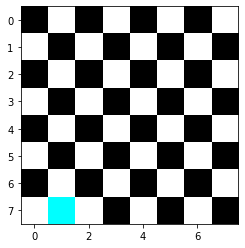

In [12]:
fischer.add_blue(7, 1)
assert fischer.is_under_attack() == True
fischer.render()

## Test `is_under_attack()` False


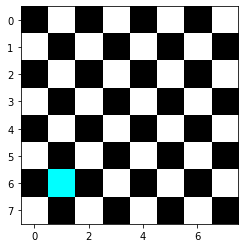

In [13]:
fischer.add_blue(6, 1)
assert fischer.is_under_attack() == False
fischer.render()